In [99]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [100]:
df = pd.read_csv('C:\\Users\\HP\\Documents\\project\\Crop_recommendation.csv')

In [101]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [102]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [104]:
df.shape

(2200, 8)

In [105]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [106]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [107]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [108]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [109]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [110]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [111]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder

In [112]:
#encoding label variable
encode_crop = LabelEncoder()

#fitting the label encoder
df.label = encode_crop.fit_transform(df.label)

#creating the DataFrame
label = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
label = label.set_index('Original')
label

,Encoded
Original,
apple,0
banana,1
blackgram,2
chickpea,3
coconut,4
coffee,5
cotton,6
grapes,7
jute,8


In [113]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [114]:
import pickle
pickle_out = open('model\\crop.pkl','wb')
pickle.dump(encode_crop,pickle_out)
pickle_out.close()

In [115]:
#from sklearn.preprocessing import LabelEncoder
#df['label']=LabelEncoder().fit_transform(df['label'])
#df['label'].unique()

In [116]:
#Seperating features and target label

In [117]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [118]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [119]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [120]:
#Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.59      1.00      0.74        16
           3       1.00      1.00      1.00        21
           4       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.74      0.93      0.83        28
           9       0.00      0.00      0.00        14
          10       0.68      1.00      0.81        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.00      0.00      0.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00    

In [122]:
from sklearn.model_selection import cross_val_score

In [123]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [124]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [125]:
#Saving trained Decision Tree model

In [126]:
import pickle
# Dump the trained Decision tree classifier with Pickle
DT_pkl_filename = 'model\DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [127]:
#KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier  

knn= KNeighborsClassifier()  

knn.fit(Xtrain,Ytrain)

predicted_values = knn.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('KNN')
print("KNN's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

KNN's Accuracy is:  0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.89      0.86      0.87        28
           9       0.93      1.00      0.97        14
          10       0.96      1.00      0.98        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      0.89      0.94        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
 

In [129]:
# Cross validation score (KNN)
score = cross_val_score(knn,features,target,cv=5)
score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

In [130]:
#Saving trained KNN model
import pickle
# Dump the trained KNN classifier with Pickle
KNN_pkl_filename = 'model\\KNNClassifier.pkl'
# Open the file to save as pkl file
KNN_Model_pkl = open(KNN_pkl_filename, 'wb')
pickle.dump(knn, KNN_Model_pkl)
# Close the pickle instances
KNN_Model_pkl.close()

In [131]:
#Guassian Naive Bayes

In [132]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00  

In [133]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [134]:
#Saving trained Guassian Naive Bayes model

In [135]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'model\\NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [136]:
#Support Vector Machine (SVM)

In [137]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      0.95      0.98        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.83      0.89      0.86        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.0

In [138]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [139]:
#Saving trained SVM model

In [140]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'model\SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

In [141]:
#Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.86      0.75      0.80        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.86      0.90      0.88        20
           7       1.00      1.00      1.00        18
           8       0.84      0.93      0.88        28
           9       1.00      1.00      1.00        14
          10       0.88      1.00      0.94        23
          11       0.90      0.86      0.88        21
          12       0.96      1.00      0.98        26
          13       0.84      0.84      0.84        19
          14       1.00      0.96      0.98        24
          15       1.00      1.00      1.00        23
          16       1.00   

In [143]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [144]:
#Saving trained Logistic Regression model
import pickle
# Dump the trained Logistic Regression classifier with Pickle
LR_pkl_filename = 'model\LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [145]:
#Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00 

In [147]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [148]:
#Saving trained Random Forest model

In [149]:
import pickle
# Dump the trained Random Forest classifier with Pickle
RF_pkl_filename = 'model\RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [150]:
#XGBoost

In [151]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       1.00      0.93      0.96        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00     

In [152]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99090909, 0.99090909])

In [153]:
#Saving trained XGBoost model

In [154]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'model\XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

In [155]:
#Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

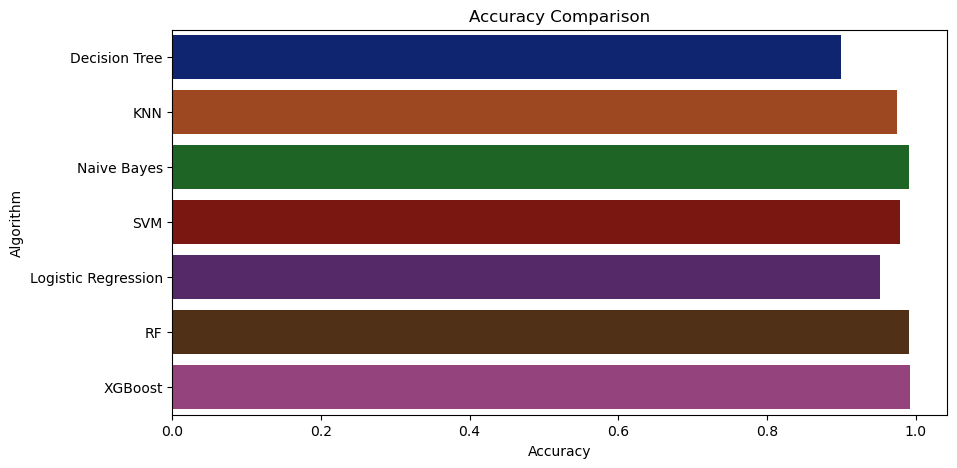

In [156]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [157]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
KNN --> 0.975
Naive Bayes --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091
XGBoost --> 0.9931818181818182


In [158]:
Xtrain

,N,P,K,temperature,humidity,ph,rainfall
1936,113,38,25,22.000851,79.472710,7.388266,90.422242
610,28,35,22,29.530376,86.733460,7.156563,59.872321
372,11,61,21,18.623288,23.024103,5.532101,135.337803
1559,29,139,205,23.641424,93.744615,6.155939,116.691218
1500,24,128,196,22.750888,90.694892,5.521467,110.431786
...,...,...,...,...,...,...,...
1071,105,88,54,25.787498,84.511942,6.020445,114.200546
433,27,71,23,23.453790,46.487148,7.109598,150.871220
674,23,39,22,29.256493,81.979522,6.864839,42.024833
1099,117,81,53,29.507046,78.205856,5.507642,98.125658


In [159]:
Ytrain

1936     6
610     14
372      9
1559     0
1500     0
        ..
1071     1
433     18
674     14
1099     1
1608    16
Name: label, Length: 1760, dtype: int32

In [160]:
#Making a prediction

In [161]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

[5]


In [162]:
data = np.array([[40, 24, 25, 28.7, 50.4, 5.44, 95.8]])
prediction = XB.predict(data)
print(prediction)

[12]


In [163]:
data = np.array([[2, 24, 38, 24.5, 91.6, 5.9, 111.9]])
prediction = XB.predict(data)
print(prediction)

[19]


In [164]:
data = np.array([[91, 94, 46, 29.3, 76.2, 6.1, 92.8]])
prediction = XB.predict(data)
print(prediction)

[1]


In [165]:
crop = pickle.load(open('model\\crop.pkl','rb'))
crop.classes_[5]

'coffee'

In [166]:
crop.classes_[12]

'mango'

In [167]:
crop.classes_[19]

'pomegranate'

In [168]:
crop.classes_[1]

'banana'